In [1]:
%matplotlib inline
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

In [2]:
matplotlib.rcParams.update({'font.size':18}) 
matplotlib.rcParams.update({'font.family':'serif'})

Reading in files:

In [3]:
Kep_ID, Pair_ID, Gal_Prob, Photo_Dist, Pair_Dist = np.loadtxt ('kolby-data.txt', usecols=(0,1,2,3,4), unpack=True)

In [4]:
row, Lfl_Lbol, giclr, kicnum = np.genfromtxt('kic_lflare.csv', delimiter = ',', unpack = True)

x=np.where((Lfl_Lbol < 1e-15))
Lfl_Lbol[x]=1e-15

Matching Datasets:

In [5]:
m = np.array(np.zeros(len(Kep_ID)), dtype='int')

for k in range (len(Kep_ID)):
    x = np.where((Kep_ID[k] == kicnum))
    m[k] = x[0]
#     Kep_ID == kicnum[x]
    
m
# in database speak, this a Join (Inner Join)
# Kep_ID == kicnum[m]


array([132675, 132661, 144449, ..., 172529, 170764, 170761])

In [6]:
kicnum[m] == Kep_ID

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

Distinguishing primary stars from secondary stars:

In [7]:
a = np.arange(0,1094,2)
b = np.arange(1,1094,2)

for j in range(0,len(a)):
    if giclr[m][a[j]] > giclr[m][b[j]]:
        tmp = a[j]
        a[j] = b[j]
        b[j] = tmp

Converting pair distances to AU:

In [9]:
AU_dist = Pair_Dist/3600.*np.pi/180. * Photo_Dist * 206265.
AU_cut = np.where(AU_dist < 120000)
print(np.mean(AU_dist[AU_cut]))

64088.9032584


Filtering for minium flare luminosity, pro

In [16]:
Good_both_a2 = np.where((Lfl_Lbol[m][a]>1e-7)  & (Gal_Prob[a]>0.001) & (AU_dist[a] < 120000))
Good_both_b2 = np.where((Lfl_Lbol[m][b]>1e-7)  & (Gal_Prob[b]>0.001) & (AU_dist[b] < 120000))

Good_either2 = np.where(((Lfl_Lbol[m][a] > 1e-7) | (Lfl_Lbol[m][b] > 1e-7)) & 
                        ((Lfl_Lbol[m][a] > 1e-15) & (Lfl_Lbol[m][b] > 1e-15)) &
                        (Gal_Prob[a] < 0.01) & 
                        (AU_dist[a] < 120000))
print(np.size(Good_either2))

42


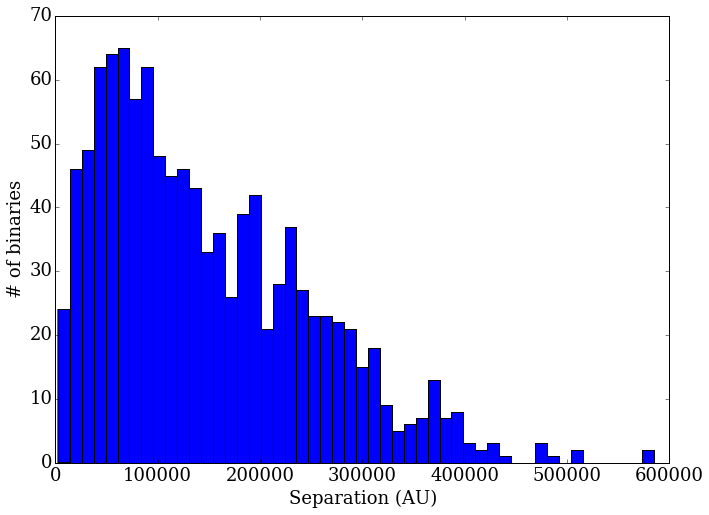

In [17]:
plt.figure(figsize=(11,8))
plt.hist(AU_dist, bins=50)
plt.xlabel('Separation (AU)')
plt.ylabel('# of binaries')
plt.savefig('PairDistances')

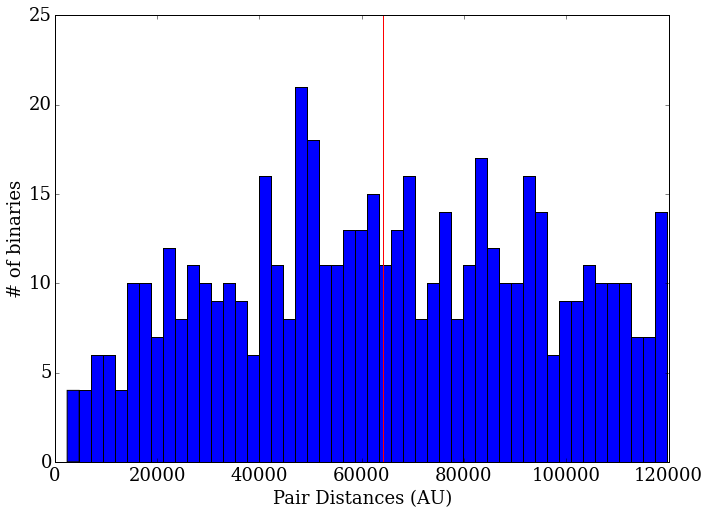

In [18]:
plt.figure(figsize=(11,8))
plt.hist((AU_dist[AU_cut]), bins = 50)
plt.plot([64088.9,64088.9],[0,25],'r')
plt.xlabel('Pair Distances (AU)')
plt.ylabel('# of binaries')
plt.savefig('AU_pairdist')

/Users/Riley/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


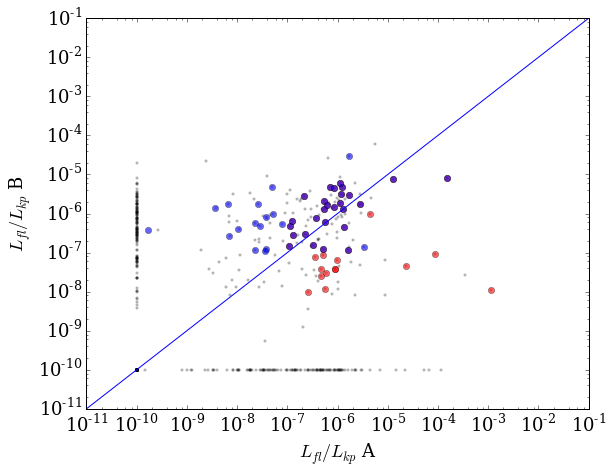

In [19]:
plt.figure(figsize=(9,7))
plt.plot(Lfl_Lbol[m][a][Good_both_a2], Lfl_Lbol[m][b][Good_both_a2], 'ro', alpha = 0.6)
plt.plot(Lfl_Lbol[m][a][Good_both_b2], Lfl_Lbol[m][b][Good_both_b2], 'bo', alpha = 0.6)
plt.scatter(Lfl_Lbol[m][a]+1e-10, Lfl_Lbol[m][b]+1e-10, s=5, c='k', alpha=0.2)
plt.xlim(1e-11, 1e-1)
plt.ylim(1e-11,  1e-1)
plt.plot([1e-11,1], [1e-11,1])
# plt.plot([1e-11,1]*2, [1e-11,1]*2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$L_{fl}/L_{kp}$ A')
plt.ylabel('$L_{fl}/L_{kp}$ B')
plt.savefig('AB.png')

In [20]:
gi_redcut= np.where(giclr[m][a][Good_either2] <= np.median(giclr[m][a][Good_either2]))
gi_bluecut= np.where(giclr[m][a][Good_either2] > np.median(giclr[m][a][Good_either2]))                    
print(np.median(giclr[m][a][Good_either2]))

0.7055


/Users/Riley/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


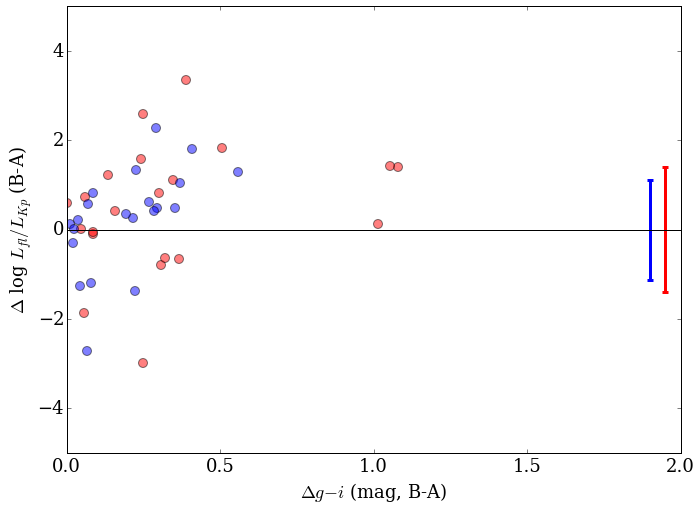

In [21]:
plt.figure(figsize=(11,8))
plt.scatter(giclr[m][b][Good_either2][gi_redcut] - giclr[m][a][Good_either2][gi_redcut],
            np.log10(Lfl_Lbol[m][b][Good_either2][gi_redcut]/Lfl_Lbol[m][a][Good_either2][gi_redcut]), 
            c='r', alpha=0.5,s=80)

plt.scatter(giclr[m][b][Good_either2][gi_bluecut] - giclr[m][a][Good_either2][gi_bluecut],
            np.log10(Lfl_Lbol[m][b][Good_either2][gi_bluecut]/Lfl_Lbol[m][a][Good_either2][gi_bluecut]),
            c='b', alpha=0.5,s=80)
plt.xlim(0,2)
plt.ylim(-5,  5)
plt.plot([-2,2],[0,0], color = 'k')
plt.xlabel('$\Delta g-i$ (mag, B-A)')
# plt.ylabel('[$L_{fl}/L_{kp}$ B] / [$L_{fl}/L_{kp}$A]')
plt.ylabel(r'$\Delta$ log $L_{fl}/L_{Kp}$ (B-A)' )
# plt.yscale('log')


redstd = np.std(np.log10(Lfl_Lbol[m][b][Good_either2][gi_redcut] / Lfl_Lbol[m][a][Good_either2][gi_redcut]))
plt.errorbar(1.95,0,redstd, color='r', ecolor='r', lw=3, mew=3)

bluestd = np.std(np.log10(Lfl_Lbol[m][b][Good_either2][gi_bluecut] / Lfl_Lbol[m][a][Good_either2][gi_bluecut]))
plt.errorbar(1.9,0,bluestd, color='b', ecolor='b', lw=3, mew=3)



plt.savefig('Color_diagram_v3')